## Краткий туториал по NumPy

Данное руководство ни в коем случае не предентует на полноту изложения

[NumPy](https://docs.scipy.org/doc/numpy/user/index.html)

[Quickstart guide](https://docs.scipy.org/doc/numpy/user/quickstart.html)

Библиотека NumPy предоставляет возможность удобно работать с многомерными массивами

**Преимущества** `NumPy`:
* Векторизованные вычисления
* Broadcasting

**Сравнение производительности**
![Imgur](https://i.imgur.com/z4GzOX6.png)

Основным использующимся классом библиотеки NumPy является [ndarray](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html)

**Отличия** `ndarray` и Python sequences: 
* ndarray может содержать объекты только одного типа
* ndarray имеет фиксированную длину, которая определяется в момент его создания

In [1]:
import numpy as np

### Способы создания Numpy arrays
* Конвертация из стуктур данных Python (e.g., lists, tuples)
* Генерация с помощью встроенных функций (e.g., arange, ones, zeros, etc.)
* Чтение с диска

### Конвертация из стуктур данных Python

In [2]:
np.array([1, 2, 3, 4, 5])

array([1, 2, 3, 4, 5])

При конвертации можно задавать тип данных с помощью аргумента [dtype](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dtype.html): 

In [3]:
np.array([1, 2, 3, 4, 5], dtype=np.float32)

array([1., 2., 3., 4., 5.], dtype=float32)

Аналогичное преобразование:

In [4]:
np.float32([1, 2, 3, 4, 5])

array([1., 2., 3., 4., 5.], dtype=float32)

**Но**: элементы NumPy array должны быть одного типа

In [5]:
a = [1, 'a', 1.2, []]
np.array(a)

ValueError: setting an array element with a sequence

In [6]:
np.array(a, dtype=object)

array([1, 'a', 1.2, list([])], dtype=object)

Размер объекта в байтах:

In [7]:
np.float32([1, 2, 3, 4, 5]).nbytes

20

In [8]:
np.float16([1, 2, 3, 4, 5]).nbytes

10

### Генерация с помощью встроенных функций

* [arange](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html) — аналог range из Python, можно передать нецелочисленный шаг
* [linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) — равномерное разбиение отрезка на n-1 интервал
* [logspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.logspace.html) — разбиение отрезка по логарифмической шкале
* [zeros](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html) — массив из нулей заданной размерности
* [ones](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html) — массив из единиц
* [empty](https://docs.scipy.org/doc/numpy/reference/generated/numpy.empty.html) — массив неинициализированный никаким значением
* [random](https://docs.scipy.org/doc/numpy/reference/routines.random.html) - модуль, предоставляющий различные функции создания случайных массивов

In [9]:
np.arange(0, 3, 0.5)

array([0. , 0.5, 1. , 1.5, 2. , 2.5])

In [10]:
np.linspace(0, 3, 7)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. ])

In [11]:
np.logspace(0, 9, 10, base=2)

array([  1.,   2.,   4.,   8.,  16.,  32.,  64., 128., 256., 512.])

In [12]:
np.zeros((3, 3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [13]:
np.ones((3, 5))

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [14]:
np.empty((2, 4))

array([[0.00e+000, 0.00e+000, 0.00e+000, 0.00e+000],
       [0.00e+000, 5.99e-321, 0.00e+000, 0.00e+000]])

In [15]:
np.random.rand(10)

array([0.21866315, 0.94372839, 0.79922469, 0.25355215, 0.31855707,
       0.42581275, 0.90894605, 0.25591723, 0.69391791, 0.9257363 ])

Pазмеры массива хранятся в поле **shape**, а количество размерностей - в **ndim**

In [16]:
array = np.ones((2, 3))
print('Размерность массива - {}, количество размерностей - {}'.format(array.shape, array.ndim))

Размерность массива - (2, 3), количество размерностей - 2


Метод [reshape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html) возвращает новое `view` массива, если возможно. Если нет, то возвращается копия

In [17]:
array = np.arange(0, 10, 1)
array = array.reshape((2, 5))
array

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

Если нужно, чтобы возникала ошибка при копировании, стоит присваивать новое значение атрибута `shape`, а не пользоваться функцией `reshape`

Функция [ravel](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ravel.html) позволяет развернуть многомерный массив в вектор 

In [18]:
array = np.ravel(array)
array

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [19]:
a = np.zeros((10, 2))
# A transpose makes the array non-contiguous
b = a.T
# Taking a view makes it possible to modify the shape without modifying
# the initial object.
c = b.view()
c.shape = (20)

AttributeError: incompatible shape for a non-contiguous array

### Индексация

NumPy использует привычную индексацию Python, в том числе отрицательные индексы и срезы

In [20]:
print(array)
print(array[3])
print(array[-1])
print(array[1:-1])
print(array[1:-1:2])
print(array[::-1])

[0 1 2 3 4 5 6 7 8 9]
3
9
[1 2 3 4 5 6 7 8]
[1 3 5 7]
[9 8 7 6 5 4 3 2 1 0]


**Замечание 1** Срезы в numpy возвращают `view`, а не копию массива

**Замечание 2**: При индексации многомерных массивов можно использовать только одну пару квадратных скобоок, т.е. вместо `array[i][j]` можно писать `array[i, j]`

В качестве индексов можно использовать массивы индексов и булевые маски:

In [21]:
array[[0, 2, 4, 6, 8]]

array([0, 2, 4, 6, 8])

In [22]:
array[[True, False, True, False, True, False, True, False, True, False]]

array([0, 2, 4, 6, 8])

`:` - полный срез по оси

In [23]:
x = np.array([[[1, 2, 3], [4, 5, 6]]])
x[:, :, 0]

array([[1, 4]])

Если количество индексов меньше количества осей, то пропущенные индексы считаются равными `:`

In [24]:
x[0]

array([[1, 2, 3],
       [4, 5, 6]])

`...` (**dots**) - удобный синтаксис, когда нужно использовать несколько `:` для задания полного индекса

Например, пусть `x` - `np.array` с 5 осями. Тогда

```
x[1, 2, ...] - то же самое, что x[1, 2, :, :, :],
x[..., 3] эквивалетно x[:, :, :, :, 3]
x[4, ..., 5, :] эквивалентно x[4, :, :, 5, :]
```

In [25]:
x[..., 0]

array([[1, 4]])

`np.newaxis` и `None`

In [26]:
x = np.array([10, 20])
print(x, x.shape)
print(x[np.newaxis], x[np.newaxis].shape, x[None].shape)
print(x[np.newaxis, :], x[np.newaxis, :].shape)
print(x[:, np.newaxis], x[:, np.newaxis].shape)

[10 20] (2,)
[[10 20]] (1, 2) (1, 2)
[[10 20]] (1, 2)
[[10]
 [20]] (2, 1)


### Операции

`NumPy` позволяет производить операции над массивами одинаковой размерности (в том числе над многомерными) без использования циклов

In [27]:
a = np.array([0, 2, 4, 6, 8, 10])
b = np.array([10, 12, 14, 16, 18, 110])

In [28]:
print(a - b)
print(a + b)
print(a * b)
print(a / b)

[ -10  -10  -10  -10  -10 -100]
[ 10  14  18  22  26 120]
[   0   24   56   96  144 1100]
[0.         0.16666667 0.28571429 0.375      0.44444444 0.09090909]


Также `NumPy` предоставляет разнообразные математические операции

In [29]:
print(np.sin(10))
print(np.sqrt(100))
print(np.exp(2))

-0.5440211108893698
10.0
7.38905609893065


**Замечание:** Все арифметические операции над массивами одинаковой размерности производятся поэлементно

### [Broadcasting](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html)

Broadcasting позволяет производить арифметические операции над массивами разных, но согласованных размерностей.

Правило согласования размерностей: `Two dimensions are compatible when they are equal, or one of them is 1`

В противном случае будет выброшено исключение `ValueError: operands could not be broadcast together `

Пример: умножение вектора на число:

![Imgur](https://i.imgur.com/tE3ZCWG.gif)

In [30]:
np.arange(1, 4) * 2

array([2, 4, 6])

Если количество размерностей не совпадает, то к массиву меньшей размерности добавляются размерности "слева"

In [31]:
a = np.ones((2,3,4))
b = np.ones(4)
c = a * b  # a.shape == (2, 3, 4) -> b.shape is considered to be (1, 1, 4)

print(a.shape, b.shape, c.shape)

(2, 3, 4) (4,) (2, 3, 4)


Сложение строк матрицы с одним и тем же вектором:

![Imgur](https://i.imgur.com/VsP2dqT.gif)

In [32]:
a = np.array(
    [[0, 0, 0],
     [10, 10, 10],
     [20, 20, 20],
     [30, 30, 30]]
)
b = np.arange(3)

c = a + b
print(c)

[[ 0  1  2]
 [10 11 12]
 [20 21 22]
 [30 31 32]]


Сложить вектор со столбцами, а не со строками, не получится, т.к. вектор должен состоять из 4 элементов и поэтому размерности будут не согласованы

![Imgur](https://i.imgur.com/9LvGoeL.gif)

Для такой операции нужно преобразовать вектор:

In [33]:
b = np.arange(4)[:, np.newaxis]
b

array([[0],
       [1],
       [2],
       [3]])

А затем сложить его с матрицей:

In [34]:
a = np.array([[0, 0, 0], [10, 10, 10], [20, 20, 20], [30, 30, 30]])
b + a

array([[ 0,  0,  0],
       [11, 11, 11],
       [22, 22, 22],
       [33, 33, 33]])

Оператор `*` выполняет поэлеметное умножение массивов. Для умножения по правилу перемножения матриц следует использовать функцию [np.dot](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html)

Для траспонирования матриц можно использовать `ndarray.T` (пример: `a.T`) или [np.transpose](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.transpose.html)

Так же в NumPy реализованно много полезных операций для работы с массивами:
- [np.min](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.min.html),
- [np.max](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.max.html),
- [np.sum](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html),
- [np.mean](https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html)
- ...

**Замечание:** многие функции имеют параметр **axis**, который указывает по какому измерению производить данную операцию. По умолчанию операция производится по всем значениям массива

Например,

In [35]:
a = [[1, 2, 3],
    [20, 40, 60],
    [300, 600, 900]
]

print('Среднее всех значений: {}'.format(np.mean(a)))
print('Среднее значение по строкам: {}'.format(np.mean(a, axis=0)))
print('Среднее значение по столбцам: {}'.format(np.mean(a, axis=1)))

Среднее всех значений: 214.0
Среднее значение по строкам: [107. 214. 321.]
Среднее значение по столбцам: [  2.  40. 600.]


### Конкатенация многомерных массивов

Конкатенировать несколько массивом можно с помощью функций [**np.concatenate, np.hstack, np.vstack**](https://stackoverflow.com/questions/33356442/when-should-i-use-hstack-vstack-vs-append-vs-concatenate-vs-column-stack)

In [36]:
a = [[1, 2, 3],
    [20, 40, 60],
    [300, 600, 900]]

b = [[-1, -2, -3],
    [-20, -40, -60],
    [-300, -600, -900]]

In [37]:
np.hstack([a, b])

array([[   1,    2,    3,   -1,   -2,   -3],
       [  20,   40,   60,  -20,  -40,  -60],
       [ 300,  600,  900, -300, -600, -900]])

In [38]:
np.vstack([a, b])

array([[   1,    2,    3],
       [  20,   40,   60],
       [ 300,  600,  900],
       [  -1,   -2,   -3],
       [ -20,  -40,  -60],
       [-300, -600, -900]])

## [scipy.sparse](https://docs.scipy.org/doc/scipy/reference/sparse.html)

Библиотека scipy.sparse предоставляет возможность удобно работать с 2D-разреженными матрицами

**Типы матриц**:
* bsr_matrix — Block Sparse Row matrix
* coo_matrix — A sparse matrix in COOrdinate format
* csc_matrix — Compressed Sparse Column matrix
* csr_matrix — Compressed Sparse Row matrix
* dia_matrix — Sparse matrix with DIAgonal storage
* dok_matrix — Dictionary Of Keys based sparse matrix
* lil_matrix — Row-based linked list sparse matrix

In [39]:
from scipy.sparse import csc_matrix, eye

**Создание**:

In [40]:
m = csc_matrix((3, 4), dtype=np.int8)
m.toarray()

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=int8)

In [41]:
m = csc_matrix(np.zeros((3, 4), dtype=np.int8))
m.toarray()

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=int8)

In [42]:
m = eye(4, 4, dtype=np.int8, format='csc')
m.toarray()

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]], dtype=int8)

In [43]:
row = np.array([0, 2, 2, 0, 1, 2])
col = np.array([0, 0, 1, 2, 2, 2])
data = np.array([1, 2, 3, 4, 5, 6])
m = csc_matrix((data, (row, col)), shape=(3, 3))
m.toarray()

array([[1, 0, 4],
       [0, 0, 5],
       [2, 3, 6]], dtype=int32)

**Индексирование**:

In [44]:
m[:, 1].toarray()

array([[0],
       [0],
       [3]], dtype=int32)

**Операции**:

In [45]:
print((m * 2).toarray())
print((m / 2).toarray())
# print((m - 2).toarray()) # is not supported
# print((m + 2).toarray()) # is not supported

[[ 2  0  8]
 [ 0  0 10]
 [ 4  6 12]]
[[0.5 0.  2. ]
 [0.  0.  2.5]
 [1.  1.5 3. ]]


## [Matplotlib](https://matplotlib.org/)

In [46]:
import matplotlib.pylab as plt

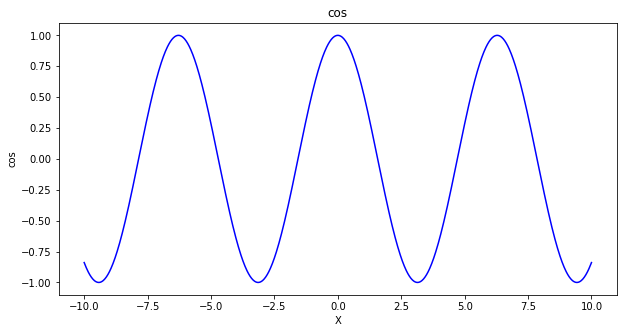

In [47]:
x = np.linspace(-10, 10, 1001)
y = np.cos(x)

plt.figure(figsize=(10, 5))
plt.title('cos')
plt.plot(x, y, color='blue')
plt.xlabel('X')
plt.ylabel('cos')
plt.show()

Два графика вместе

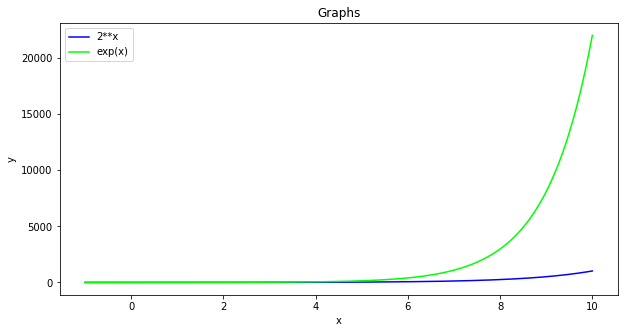

In [48]:
x = np.linspace(-1, 10, 1001)
y1 = 2 ** x
y2 = np.exp(x)

plt.figure(figsize=(10, 5))
plt.title('Graphs')
plt.plot(x, y1, color='blue', label='2**x')
plt.plot(x, y2, color='lime', label='exp(x)')

plt.legend(loc='upper left')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

`subplotes`

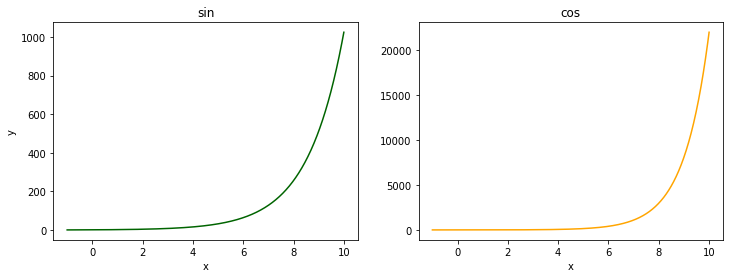

In [49]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.title('sin')
plt.plot(x, y1, color='darkgreen')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(122)
plt.title('cos')
plt.plot(x, y2, color='orange')
plt.xlabel('x')

plt.show()

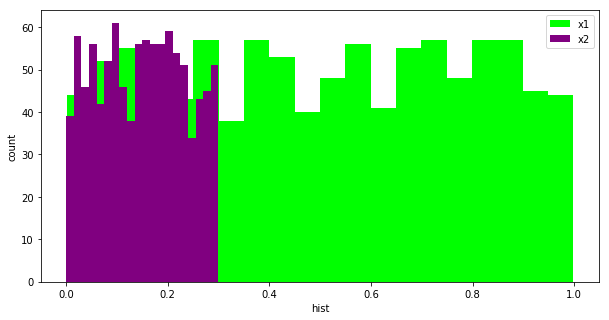

In [50]:
x1 = np.random.rand(1000)
x2 = np.random.rand(1000) * 0.3

plt.figure(figsize=(10, 5))
for x, label, color in zip([x1, x2], ['x1', 'x2'], ['lime', 'purple']):
    plt.hist(x, bins=20, color=color, label=label)
plt.xlabel('hist')
plt.ylabel('count')
plt.legend()
plt.show()

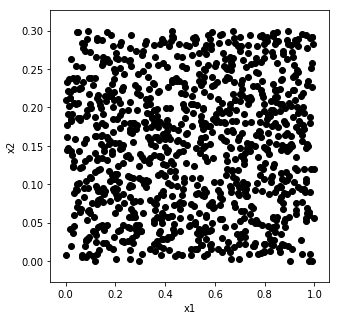

In [51]:
plt.figure(figsize=(5, 5))
plt.scatter(x1, x2, color='black')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()